# Exploratory Data Analysis of Zillow Data Set

This data is from the Kaggle competition to improve Zillow's "Zestimate": https://www.kaggle.com/c/zillow-prize-1

The data:

* properties_2017.csv: a sample of all properties from 2017 listed on Zillow through Sept
* properties_2016.csv: a sample of all properties from 2016 listed on Zillow
* train_2017.csv: contains dates, propertyids, and logerror for each transaction in 2017 through Sept
* train_2016_v2.csv: contains dates, propertyids, and logerror for each transaction in 2016
* Not all properties have transactions
* logerror=log(Zestimate)−log(SalePrice)

Goal: find a model that reduces the logerror

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from matplotlib.pyplot import cm
from uszipcode import ZipcodeSearchEngine

In [2]:
pd.set_option('display.max_columns', 65)

# Data Ingestion

In [3]:
df16 = pd.read_csv('properties_2016.csv', low_memory=False)
df_transactions16 = pd.read_csv('train_2016_v2.csv', low_memory=False)
df_merged16 = pd.merge(df16, df_transactions16, on='parcelid', how='right')
df_merged16.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,548.0,1264.0,1264.0,NaN,NaN,548.0,NaN,6111.0,NaN,2.0,2.0,0.0,NaN,NaN,34303597.0,-119287236.0,1735.0,NaN,NaN,NaN,NaN,NaN,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97081.0,5.0,NaN,1.0,NaN,NaN,128.0,NaN,1986.0,2.0,NaN,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,NaN,6.111002e+13,0.0953,2016-01-27
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,777.0,777.0,777.0,NaN,NaN,777.0,NaN,6111.0,NaN,1.0,1.0,0.0,NaN,NaN,34272866.0,-119198911.0,NaN,NaN,NaN,NaN,NaN,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97083.0,4.0,NaN,NaN,NaN,NaN,198.0,NaN,1990.0,1.0,NaN,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,NaN,6.111002e+13,0.0198,2016-03-30
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,1101.0,1101.0,1101.0,NaN,NaN,1101.0,NaN,6111.0,NaN,2.0,2.0,441.0,NaN,NaN,34340801.0,-119079610.0,6569.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1956.0,1.0,NaN,33619.0,47853.0,2015.0,14234.0,591.64,NaN,NaN,6.111001e+13,0.0060,2016-05-27
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,1554.0,1554.0,1554.0,NaN,NaN,1554.0,NaN,6111.0,1.0,1.0,2.0,460.0,NaN,NaN,34354313.0,-119076405.0,7400.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,1965.0,1.0,NaN,45609.0,62914.0,2015.0,17305.0,682.78,NaN,NaN,6.111001e+13,-0.0566,2016-06-07
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,1305.0,2415.0,2415.0,NaN,NaN,1305.0,NaN,6111.0,1.0,2.0,2.0,665.0,NaN,NaN,34266578.0,-119165392.0,6326.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,NaN,97084.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1984.0,2.0,NaN,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,NaN,6.111001e+13,0.0573,2016-08-08


In [4]:
df17 = pd.read_csv('properties_2017.csv', low_memory=False)
df_transactions17 = pd.read_csv('train_2017.csv', low_memory=False)
df_merged17 = pd.merge(df17, df_transactions17, on='parcelid', how='right')
df_merged17.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17054981,NaN,NaN,NaN,5.0,4.0,NaN,NaN,5.0,NaN,1968.0,3760.0,3760.0,NaN,NaN,1968.0,NaN,6111.0,4.0,5.0,3.0,784.0,NaN,NaN,34449407.0,-119254052.0,42688.0,1.0,735.0,NaN,NaN,1.0,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,1982.0,2.0,NaN,501928.0,872850.0,2016.0,370922.0,9673.46,NaN,NaN,6.111001e+13,-0.013099,2017-06-15
1,17055743,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,66.0,1444.0,1444.0,1444.0,NaN,NaN,1444.0,NaN,6111.0,NaN,2.0,1.0,0.0,NaN,NaN,34454169.0,-119237898.0,7108.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1951.0,1.0,NaN,130845.0,436157.0,2016.0,305312.0,5538.80,NaN,NaN,6.111001e+13,0.073985,2017-07-26
2,17068109,NaN,NaN,NaN,1.5,3.0,NaN,NaN,1.5,66.0,1698.0,1698.0,1698.0,NaN,NaN,1698.0,NaN,6111.0,1.0,1.0,0.0,0.0,NaN,NaN,34365693.0,-119448392.0,2588.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,34543.0,2061.0,NaN,97081.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,1979.0,1.0,NaN,193413.0,286606.0,2016.0,93193.0,2987.36,NaN,NaN,6.111001e+13,0.071886,2017-07-28
3,17073952,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2.0,NaN,986.0,986.0,986.0,NaN,NaN,986.0,NaN,6111.0,1.0,2.0,1.0,0.0,NaN,NaN,34305600.0,-119284000.0,NaN,NaN,NaN,NaN,NaN,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97081.0,4.0,NaN,NaN,NaN,NaN,55.0,NaN,1989.0,1.0,NaN,90357.0,258888.0,2016.0,168531.0,2706.24,NaN,NaN,6.111002e+13,0.305680,2017-06-02
4,17078502,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1170.0,1170.0,1170.0,NaN,NaN,1170.0,NaN,6111.0,1.0,1.0,2.0,621.0,NaN,NaN,34278012.0,-119257047.0,5643.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97083.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,148752.0,592930.0,2016.0,444178.0,6220.70,NaN,NaN,6.111002e+13,-0.073787,2017-07-07


## Data Cleaning for Exploration

Looking at the data above, a few columns need to be cleaned up before we can do exploratory data analysis.

First, the latitudes and longitudes are missing their decimal points:

In [5]:
df_merged17['latitude'] = df_merged17['latitude'] / 1000000
df_merged17['longitude'] = df_merged17['longitude'] / 1000000
df_merged16['latitude'] = df_merged16['latitude'] / 1000000
df_merged16['longitude'] = df_merged16['longitude'] / 1000000

Second, the tax delinquency years are listed as YY, with the first digit missing if it is a 0. Since some of the years could be from the previous century, we need to fix this so that they will sort in the correct order:

In [6]:
def convertyears(x):
    if x > 9 and x < 20:
        t = '20' + str(x)
        return float(t)
    elif x <= 9:
        t = '200' + str(x)
        return float(t)
    elif x > 20:
        t = '19' + str(x)
        return float(t)
    else:
        return np.nan
    


df_merged17['taxdelinquencyyear'] = df_merged17['taxdelinquencyyear'].map(lambda a: convertyears(a))
df_merged16['taxdelinquencyyear'] = df_merged16['taxdelinquencyyear'].map(lambda a: convertyears(a))

Let's also do a quick check of data types:

In [7]:
df_merged16.dtypes

parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                        float64


The transaction dates will be more useful in a datetime format. Categorical columns also have the wrong types, but we will deal with those on a case by case basis.

In [8]:
format = '%Y-%m-%d'
df_merged16['transactiondate'] = df_merged16['transactiondate'].map(lambda a: datetime.datetime.strptime(a, format))
df_merged17['transactiondate'] = df_merged17['transactiondate'].map(lambda a: datetime.datetime.strptime(a, format))

The pool types have been separated into one-hot columns. We are going to combine them, calculating based on poolcnt and hashottuborspa.

In [10]:
def pooltypes(a, b):
    if a and b > 0:
        return 2
    elif not(a) and b > 0:
        return 7
    elif a and b == 0:
        return 10
    else:
        return 0

    
df_merged16['poolcnt'].fillna(0, inplace=True)
df_merged16['hashottuborspa'].fillna(False, inplace=True)
df_merged17['poolcnt'].fillna(0, inplace=True)
df_merged17['hashottuborspa'].fillna(False, inplace=True)

df_merged16['pooltype'] = df_merged16.apply(lambda x: pooltypes(x['hashottuborspa'], x['poolcnt']), axis=1)
df_merged17['pooltype'] = df_merged17.apply(lambda x: pooltypes(x['hashottuborspa'], x['poolcnt']), axis=1)

In some analyses we will be looking at the combined data sets:

In [11]:
df_merged16['setyear'] = 2016
df_merged17['setyear'] = 2017
df_total = df_merged16.append(df_merged17, ignore_index=True)
df_total.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,pooltype,setyear
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,548.0,1264.0,1264.0,NaN,NaN,548.0,NaN,6111.0,NaN,2.0,2.0,0.0,False,NaN,34.303597,-119.287236,1735.0,0.0,NaN,NaN,NaN,NaN,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97081.0,5.0,NaN,1.0,NaN,NaN,128.0,NaN,1986.0,2.0,NaN,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,NaN,6.111002e+13,0.0953,2016-01-27,0,2016
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,777.0,777.0,777.0,NaN,NaN,777.0,NaN,6111.0,NaN,1.0,1.0,0.0,False,NaN,34.272866,-119.198911,NaN,0.0,NaN,NaN,NaN,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97083.0,4.0,NaN,NaN,NaN,NaN,198.0,NaN,1990.0,1.0,NaN,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,NaN,6.111002e+13,0.0198,2016-03-30,0,2016
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,1101.0,1101.0,1101.0,NaN,NaN,1101.0,NaN,6111.0,NaN,2.0,2.0,441.0,False,NaN,34.340801,-119.079610,6569.0,0.0,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1956.0,1.0,NaN,33619.0,47853.0,2015.0,14234.0,591.64,NaN,NaN,6.111001e+13,0.0060,2016-05-27,0,2016
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,1554.0,1554.0,1554.0,NaN,NaN,1554.0,NaN,6111.0,1.0,1.0,2.0,460.0,False,NaN,34.354313,-119.076405,7400.0,0.0,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,1965.0,1.0,NaN,45609.0,62914.0,2015.0,17305.0,682.78,NaN,NaN,6.111001e+13,-0.0566,2016-06-07,0,2016
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,1305.0,2415.0,2415.0,NaN,NaN,1305.0,NaN,6111.0,1.0,2.0,2.0,665.0,False,NaN,34.266578,-119.165392,6326.0,0.0,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,NaN,97084.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1984.0,2.0,NaN,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,NaN,6.111001e+13,0.0573,2016-08-08,0,2016


# Location Exploration

## Map The Log Errors

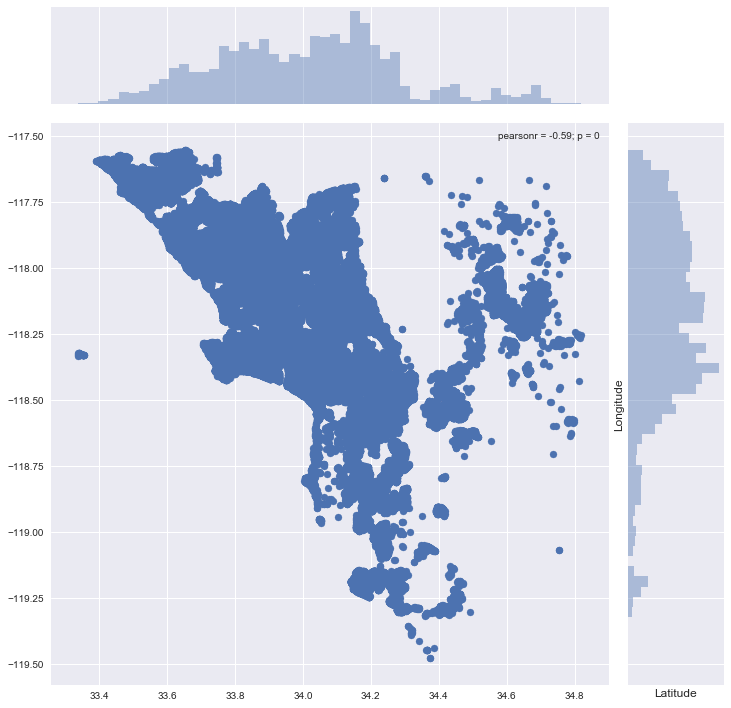

In [12]:
sns.set()
plt.figure(figsize=(12,12))
sns.jointplot(x=df_total.latitude.values, y=df_total.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

## Location Features

The location features are:
* latitude
* longitude
* regionidzip
* regionidcity
* regionidcounty
* regionidneighborhood
* fips
* censustractandblock
* rawcensustractandblock

Let's start with FIPS code, a federal code system for counties:

In [13]:
df_total['fips'].value_counts()

6037.0    109270
6059.0     45136
6111.0     13448
Name: fips, dtype: int64

To look up FIPS codes: https://www.census.gov/geo/reference/codes/cou.html

Counties in this set:
* 6037: LA County 
* 6059: Orange County 
* 6111: Ventura County

These should map 1:1 to regionidcounty values

In [14]:
pd.crosstab(df_total['fips'],df_total['regionidcounty'])

regionidcounty,1286.0,2061.0,3101.0
fips,,,
6037.0,0,0,109270
6059.0,45136,0,0
6111.0,0,13448,0


The two values correspond, so in our feature selection we will use FIPS since that has real-world meaning.

Next, we'll look at the ZIP code data:

In [15]:
df_total['regionidzip'].describe()

count    167769.000000
mean      96586.390722
std        3723.009458
min       95982.000000
25%       96193.000000
50%       96389.000000
75%       96987.000000
max      399675.000000
Name: regionidzip, dtype: float64

There appears to be an invalid US zip code for the max. Examine all impossible US zip codes:

In [16]:
temp = df_total[df_total['regionidzip'] > 100000]
temp['regionidzip']

7011      399675.0
18798     399675.0
21413     399675.0
25461     399675.0
27313     399675.0
30452     399675.0
30453     399675.0
51645     399675.0
54475     399675.0
56109     399675.0
64248     399675.0
68728     399675.0
79296     399675.0
90524     399675.0
101757    399675.0
107045    399675.0
109736    399675.0
112785    399675.0
117845    399675.0
124423    399675.0
131047    399675.0
138157    399675.0
154065    399675.0
157889    399675.0
159988    399675.0
Name: regionidzip, dtype: float64

All of the entries have the same invalid zip. Look at the county the zip code is associated with.

In [17]:
temp['fips'].value_counts()

6037.0    25
Name: fips, dtype: int64

All have the same county. Get all entries in that county:

In [18]:
temp2 = df_total[df_total['fips'] == 6037]
temp2['regionidzip'].describe()

count    109245.000000
mean      96400.618234
std        4599.561782
min       95982.000000
25%       96121.000000
50%       96273.000000
75%       96415.000000
max      399675.000000
Name: regionidzip, dtype: float64

The zip code is most likely a military zip code. Let's look at some other features of the set:

In [19]:
temp2['regionidzip'].mode()

0    97319.0
dtype: float64

This is not a US zip code. In spot checking, some of the zip codes are from CA, some are from OR, and some don't exist. In our data cleaning we will need to replace the zip code column. 

Look at the other region identifiers:

In [20]:
df_total['regionidcity'].describe()

count    164579.000000
mean      33725.134525
std       46922.468867
min        3491.000000
25%       12447.000000
50%       25218.000000
75%       45457.000000
max      396556.000000
Name: regionidcity, dtype: float64

In [21]:
df_total['regionidneighborhood'].describe()

count     66986.000000
mean     189295.685382
std      165687.734522
min        6952.000000
25%       46736.000000
50%      118872.000000
75%      274765.000000
max      764167.000000
Name: regionidneighborhood, dtype: float64

In [22]:
nbcorr = df_total[df_total['fips']==6111]

search = ZipcodeSearchEngine()
zips = pd.DataFrame(columns=['parcelid','zipcode'])

for i, row in nbcorr.iterrows():
    b = search.by_coordinate(row['latitude'],row['longitude'])
    zips.loc[len(zips)] = [row['parcelid'],b[0].Zipcode]
df_neighborhoods = pd.merge(nbcorr, zips, on='parcelid', how='left')
df_neighborhoods.groupby('regionidneighborhood')['regionidzip'].value_counts()

regionidneighborhood  regionidzip
22655.0               97084.0         21
30685.0               97101.0         10
37835.0               97116.0          1
46736.0               96351.0        896
114909.0              97107.0          3
115656.0              97106.0          9
116430.0              97081.0         19
116692.0              97083.0         27
117148.0              97106.0         15
118106.0              97106.0         11
135143.0              97107.0          8
156012.0              97101.0         19
220669.0              97104.0          1
246825.0              97104.0          5
260382.0              97109.0          1
266606.0              97104.0          8
267814.0              97101.0          6
411433.0              97084.0          8
760999.0              97104.0          4
761000.0              97104.0          2
761001.0              97106.0         11
761055.0              97083.0         37
761210.0              97083.0         14
761211.0              9

Most neighborhoods are contained within a single zip code, but some cross zipcode boundaries.

Finally, lets look at the census tracts.

In [23]:
df_total['rawcensustractandblock'].describe()

count    1.678540e+05
mean     6.049154e+07
std      2.054437e+05
min      6.037101e+07
25%      6.037312e+07
50%      6.037604e+07
75%      6.059042e+07
max      6.111009e+07
Name: rawcensustractandblock, dtype: float64

In [24]:
df_total['censustractandblock'].describe()

count    1.670020e+05
mean     6.049390e+13
std      1.054137e+12
min      6.037101e+13
25%      6.037312e+13
50%      6.037604e+13
75%      6.059042e+13
max      4.830301e+14
Name: censustractandblock, dtype: float64

In [25]:
float(df_total['rawcensustractandblock'].head(1))

61110022.003006995

In [26]:
float(df_total['censustractandblock'].head(1))

61110022003007.0

In [27]:
float(df_total['censustractandblock'].max())

483030105084015.0

The format of these values is FIPS code + census tract(six digits, in the format XXXX.XX for the raw version) + census block (four digits). The "raw" value appears to have three extra digits and censustractandblock rounds off those digits, but it also has incorrect values (eg the max has an incorrect FIPS code). 

For the US census, a county is divided into tracts, which is divided into blocks (which can be grouped together based on the first digit). A census block is the smallest geographic unit for which census data is collected, and their numbers are out of 9999 per census tract. If we wanted to examine how neighborhood demographics affect the logerror, we would be able to match census data to groups of properties based on these values. 

In [28]:
df_total['rawcensustractandblock'].fillna(0, inplace = True)
def census(a): 
    return int(round(a * 1000000))

df_total['rawcensustractandblock'] = df_total['rawcensustractandblock'].map(lambda a: census(a))

# Data Distributions

In [29]:
categorical=['airconditioningtypeid','architecturalstyletypeid','buildingclasstypeid',
             'decktypeid','heatingorsystemtypeid','storytypeid','typeconstructiontypeid',
             'pooltype','propertycountylandusecode','propertylandusetypeid','propertyzoningdesc']
numerical = ['basementsqft','bathroomcnt','bedroomcnt','buildingqualitytypeid','calculatedbathnbr',
             'finishedfloor1squarefeet','calculatedfinishedsquarefeet','finishedsquarefeet12',
             'finishedsquarefeet13','finishedsquarefeet15','finishedsquarefeet50','finishedsquarefeet6',
             'fireplacecnt','fullbathcnt','garagecarcnt','garagetotalsqft','latitude','longitude',
             'lotsizesquarefeet','poolcnt','poolsizesum','pooltypeid10','pooltypeid2','pooltypeid7','roomcnt',
             'threequarterbathnbr','unitcnt','yardbuildingsqft17','yardbuildingsqft26','yearbuilt','numberofstories',
             'structuretaxvaluedollarcnt','taxvaluedollarcnt','assessmentyear','landtaxvaluedollarcnt','taxamount',
             'taxdelinquencyyear','logerror']
flags = ['hashottuborspa','fireplaceflag','taxdelinquencyflag',]


df_num=df_total[numerical]
df_cat=df_total[categorical]
df_flag=df_total[flags]

## Frequencies

### Log Error Frequencies

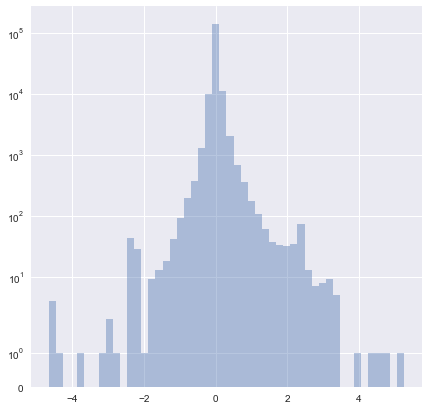

In [30]:
plt.close('all')
fig,ax=plt.subplots(figsize=(7, 7))
ax.set(yscale="symlog")
g=sns.distplot(df_num['logerror'].values, bins=50, kde=False)
plt.show()

### Numerical Data Frequencies

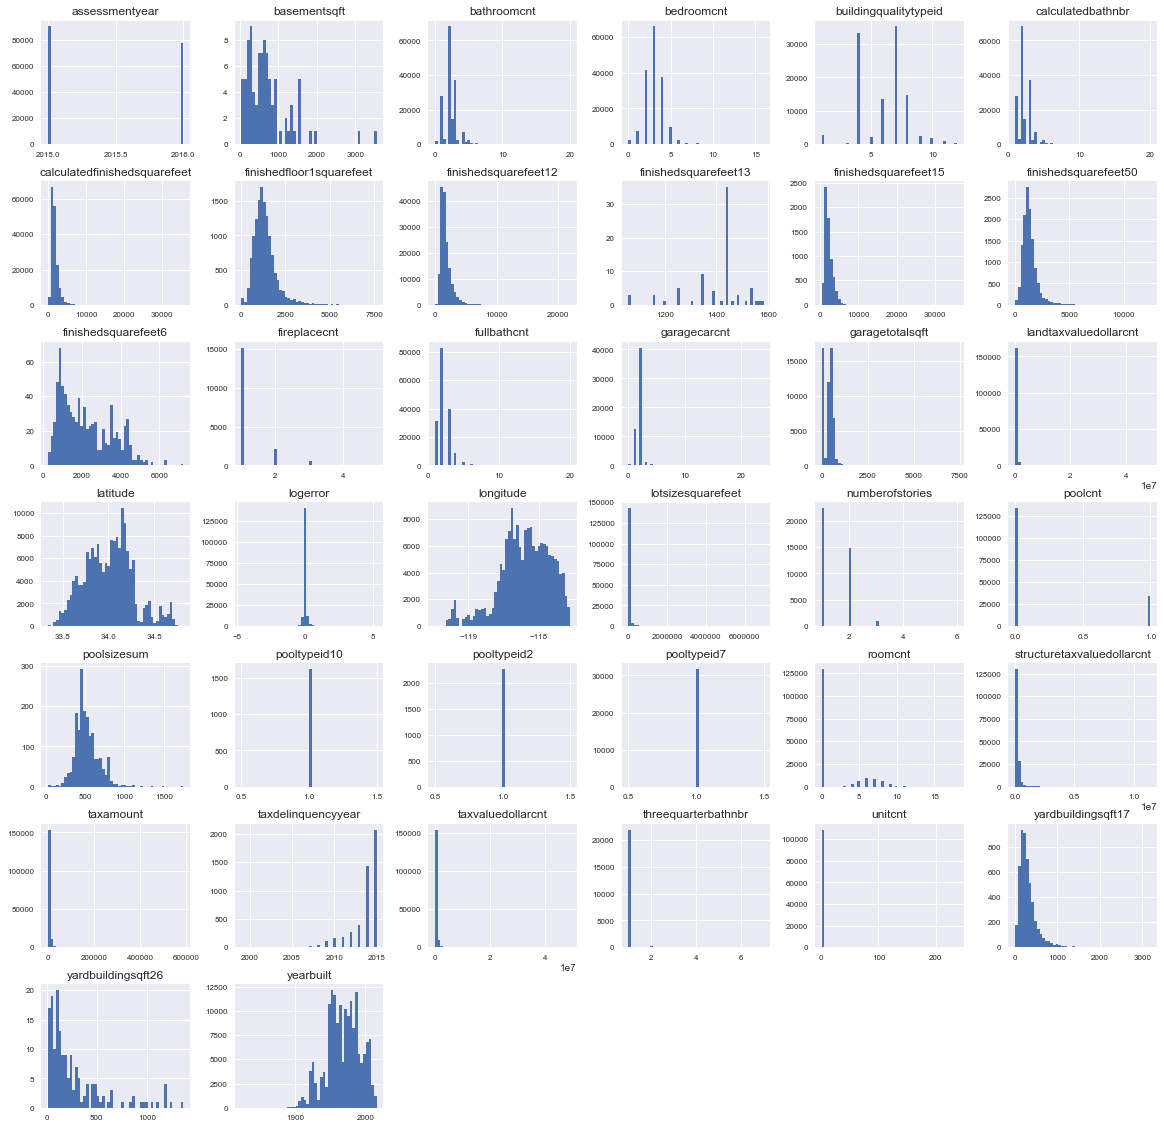

In [31]:
plt.close('all')
df_num.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8);
plt.show()

### Categorical Data Distribution

We can plot categorical data together but need to group them based on similar axis sizes

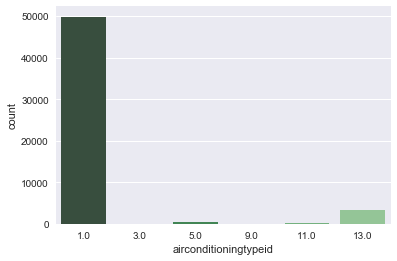

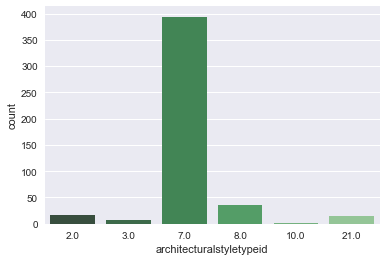

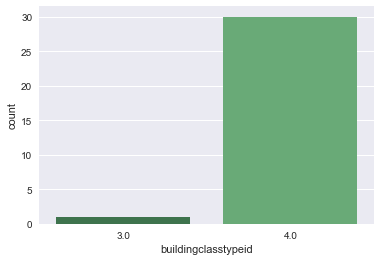

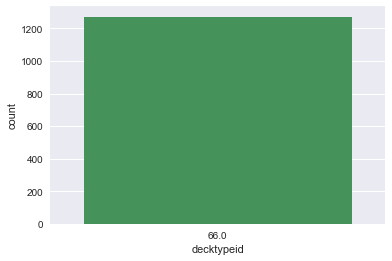

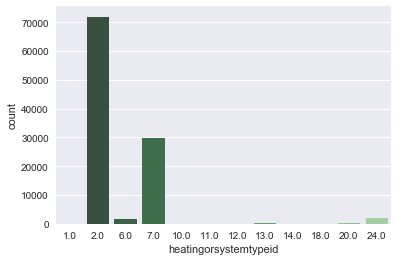

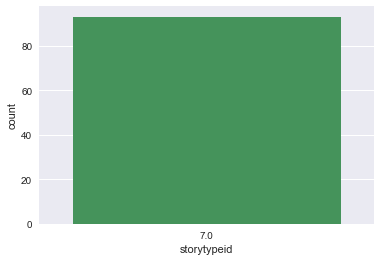

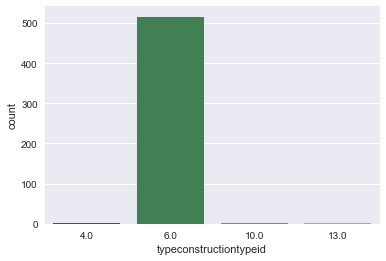

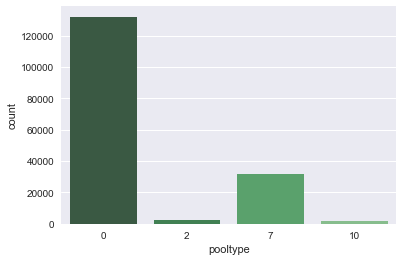

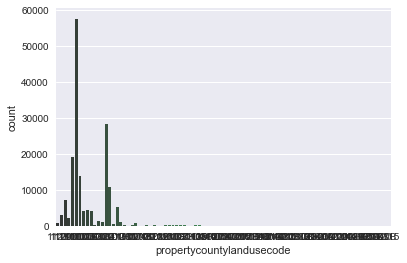

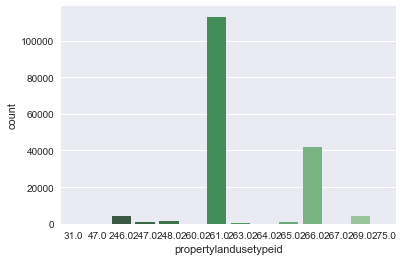

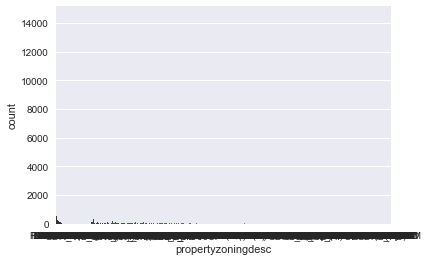

In [32]:
plt.close('all')
for c in categorical:
    sns.countplot(x=df_cat[c], data=df_cat, palette="Greens_d")
    plt.figure(figsize=(20,20))
    plt.show()

In [33]:
df_flag.describe()

,hashottuborspa,fireplaceflag,taxdelinquencyflag
count,167888,394,4683
unique,2,1,1
top,False,True,Y
freq,163984,394,4683


## Log Error Over Time

Let's look at the distribution of log errors over time:

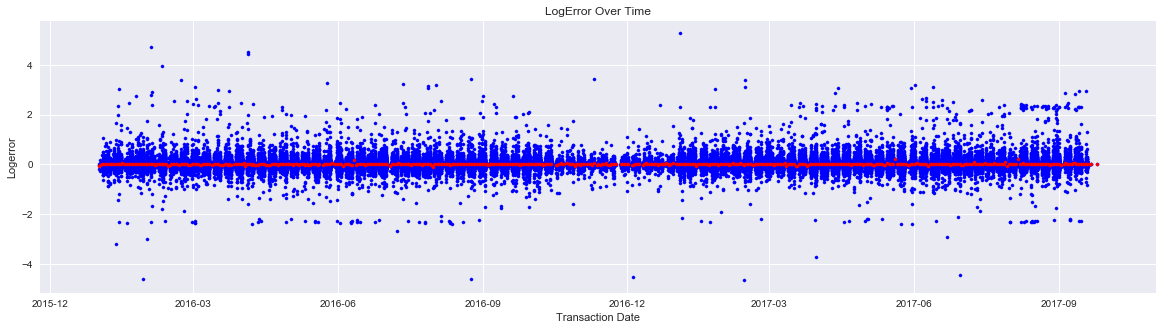

In [34]:
means = df_total.groupby('transactiondate')['logerror'].mean()

plt.close('all')
plt.figure(figsize=(20,5))
plt.scatter(df_total['transactiondate'].tolist(), df_total['logerror'], s =10, c = 'blue')
plt.scatter(means.index, means, s =10, c = 'red')
plt.title('LogError Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Logerror')
plt.show()
plt.close()

In [35]:
df_total.groupby('setyear')['logerror'].describe()

,count,mean,std,min,25%,50%,75%,max
setyear,,,,,,,,
2016,90275.0,0.011457,0.161079,-4.60500,-0.025300,0.00600,0.039200,4.737000
2017,77613.0,0.016755,0.170887,-4.65542,-0.024325,0.00667,0.039295,5.262999


The log error distributions are roughly consistent over time, with the annual means within one standard deviation of each other and an expected decrease in quantity during the winter months since there are fewer properties sold at that time of year.

# Missing Data

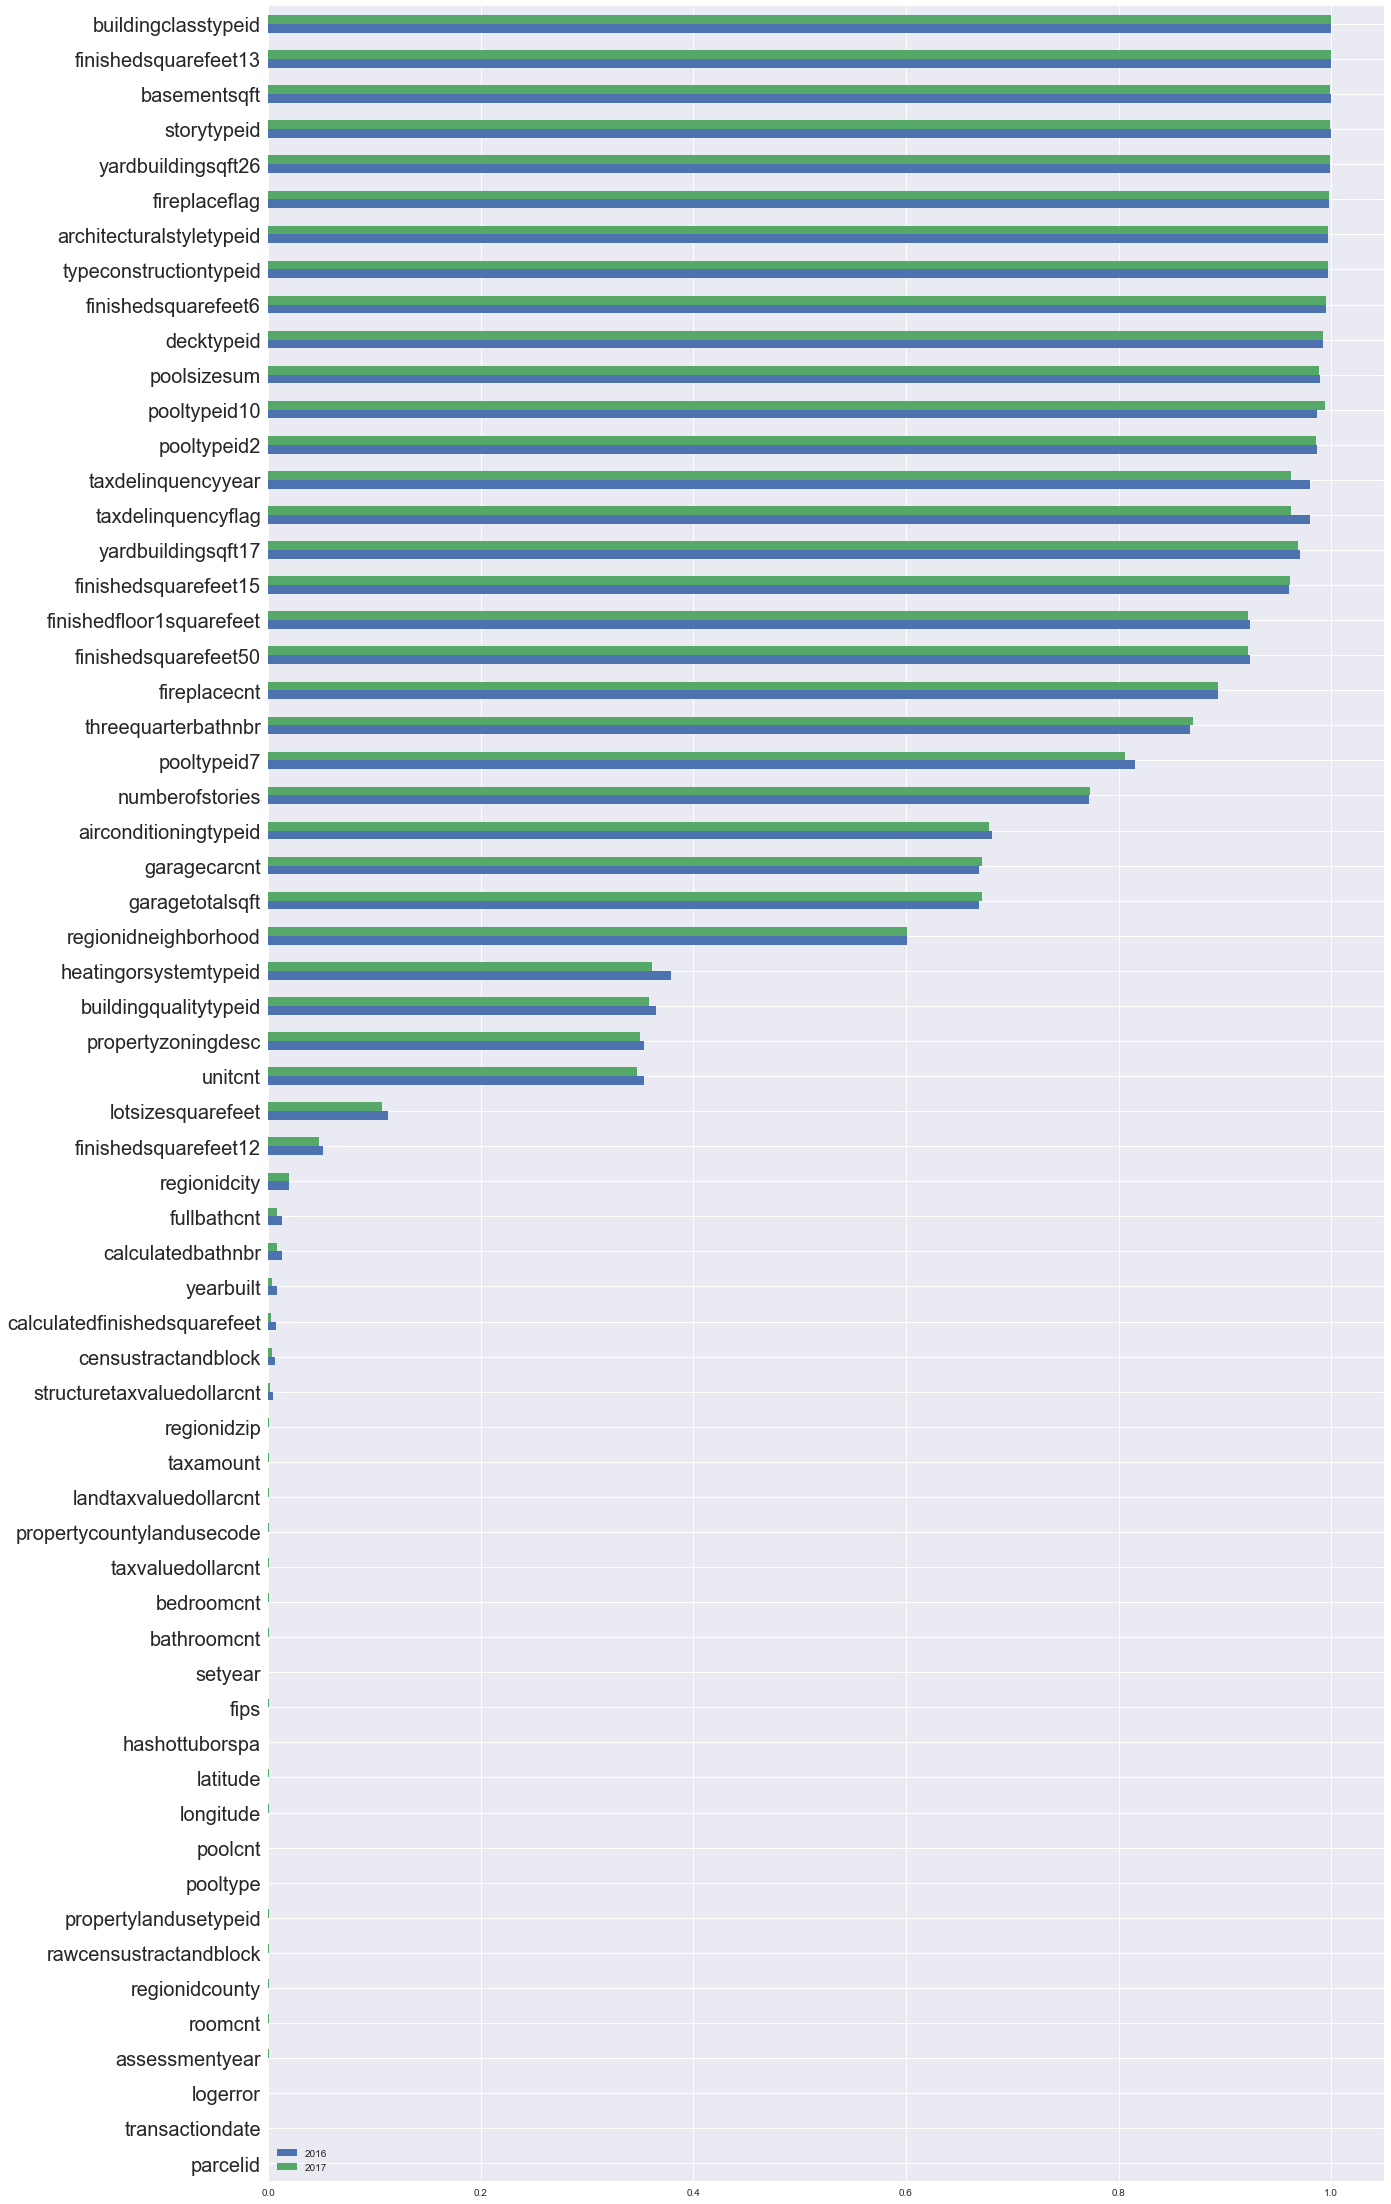

In [36]:
missing_percents16 = (len(df_merged16.index) - df_merged16.count())/len(df_merged16.index)
missing_percents17 = (len(df_merged17.index) - df_merged17.count())/len(df_merged17.index)

missing_percents16.sort_values(inplace=True)
temp = pd.DataFrame(missing_percents17, columns=['2017'])
missing_combined = pd.DataFrame(missing_percents16, columns=['2016'])
missing_combined = missing_combined.join(temp)

missing_combined.plot.barh(figsize=(20,40))
plt.yticks(size=20)
plt.show()

## Correlations

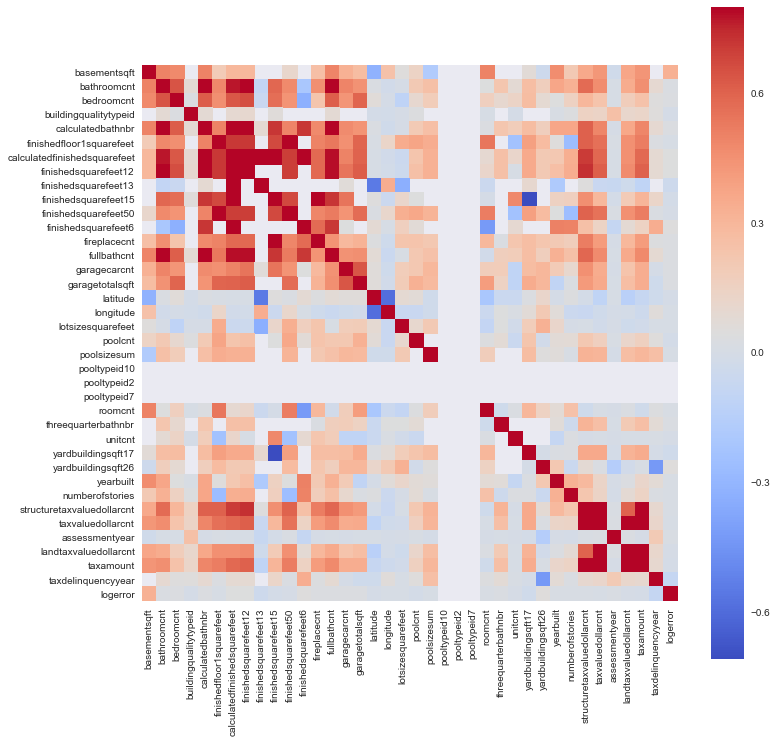

In [37]:
plt.close('all')
plt.figure(figsize=(12,12))
sns.heatmap(df_total[numerical].corr(), vmax=.8, square=True, cmap=cm.coolwarm)
plt.show()

We can see a slight positive correlation between basementsqft and logerror, as well as a slight negative correlation between taxdelinquencyyear and logerror.

More importantly, certain features are strongly correlated with eact other, consistent with the fact that they have the same or similar definitions in the data dictionary. In particular:
* bathroomcnt, calcualtedbathnbr, fullbathcnt
* finishedfloor1squarefeet, finishedsquarefeet50
* calculatedfinishedsquarefeet, finishedsquarefeet12, finsihedsquarefeet13, finishedsquarefeet15, finishedsquarefeet6
* structuretaxvaluedollarcnt, taxvaluedollarcnt, landvaluedollarcnt, taxamount

Certain features are also correlated that logically would reflect the size of the house - including number of bathrooms, number of bedrooms, total square footage, and the structure tax value.

In [40]:
#Select columns which have categorical data that we are keeping
categorical=['airconditioningtypeid','heatingorsystemtypeid','pooltype',
             'propertycountylandusecode','propertylandusetypeid','propertyzoningdesc',
             'hashottuborspa','fireplaceflag','taxdelinquencyflag','logerror']
categorical_airconditioningtypeid=['airconditioningtypeid','fips','logerror']
categorical_heatingorsystemtypeid=['heatingorsystemtypeid','fips','logerror']
categorical_pooltype=['pooltype','fips','logerror']
categorical_propertycountylandusecode=['propertycountylandusecode','fips','logerror']
categorical_propertylandusetypeid=['propertylandusetypeid','fips','logerror']
categorical_propertyzoningdesc=['propertyzoningdesc','fips','logerror']
categorical_hashottuborspa=['hashottuborspa','fips','logerror']
categorical_fireplaceflag=['fireplaceflag','fips','logerror']
categorical_taxdelinquencyflag=['taxdelinquencyflag','fips','logerror']

df_cat=df_total[categorical]
df_airconditioningtypeid=df_total[categorical_airconditioningtypeid]
df_heatingorsystemtypeid=df_total[categorical_heatingorsystemtypeid]
df_pooltype=df_total[categorical_pooltype]
df_propertycountylandusecode=df_total[categorical_propertycountylandusecode]
df_propertylandusetypeid=df_total[categorical_propertylandusetypeid]
df_propertyzoningdesc=df_total[categorical_propertyzoningdesc]
df_hashottuborspa=df_total[categorical_hashottuborspa]
df_fireplaceflag=df_total[categorical_fireplaceflag]
df_taxdelinquencyflag=df_total[categorical_taxdelinquencyflag]


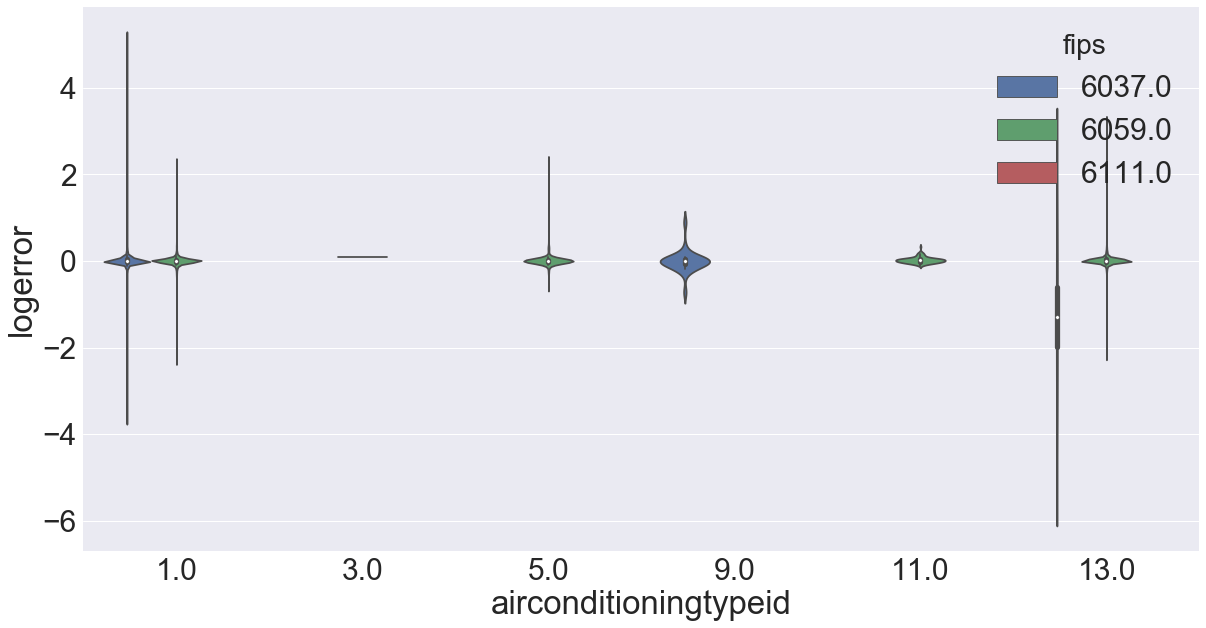

In [41]:
plt.close('all')
plt.figure(figsize=(20,10))
sns.set(font_scale = 3)
sns.violinplot(x='airconditioningtypeid', y='logerror', data=df_airconditioningtypeid, hue='fips',size=1)
plt.show()

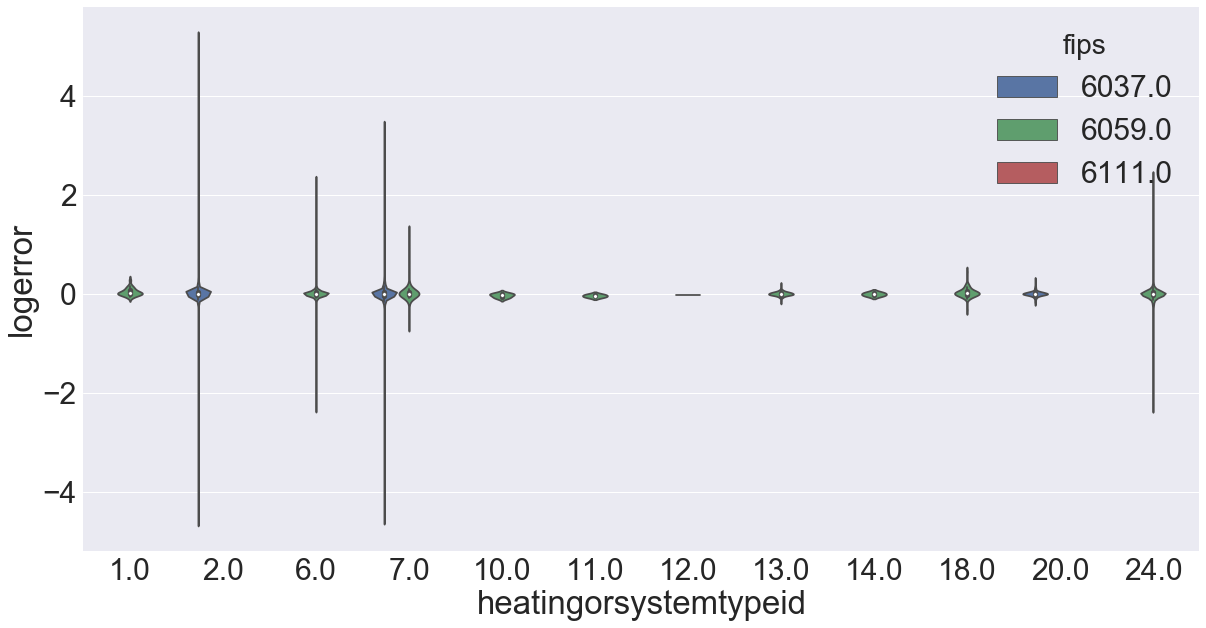

In [42]:
plt.close('all')
plt.figure(figsize=(20,10))
sns.set(font_scale = 3)
sns.violinplot(x='heatingorsystemtypeid', y='logerror', data=df_heatingorsystemtypeid, hue='fips',size=1)
plt.show()

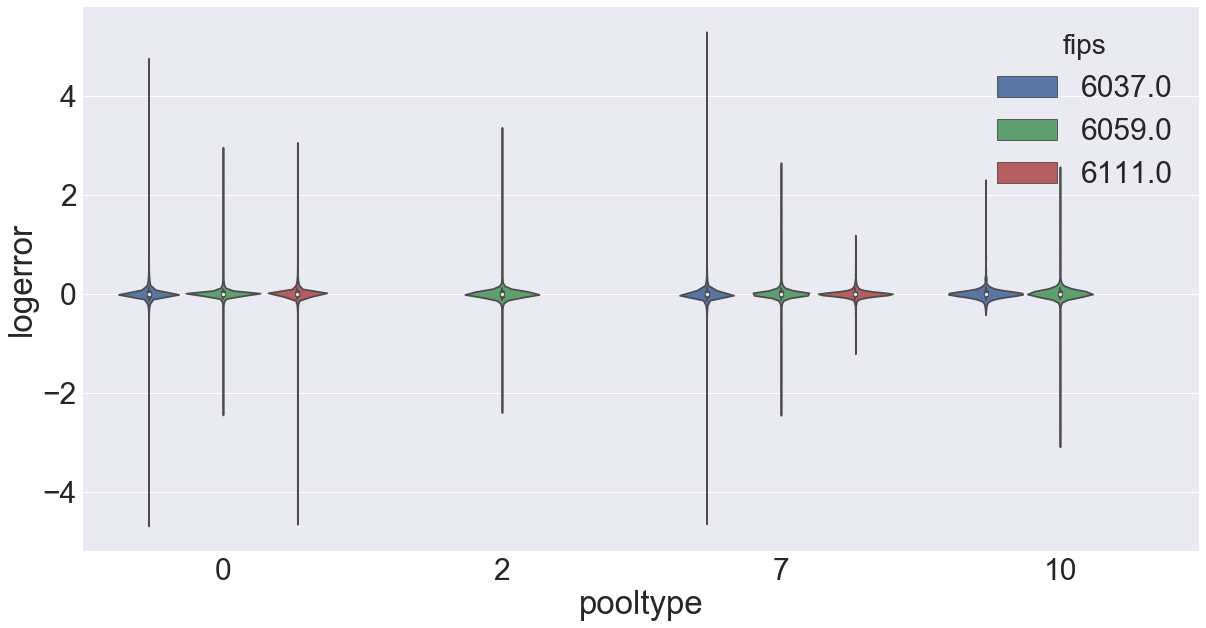

In [43]:
plt.close('all')
plt.figure(figsize=(20,10))
sns.set(font_scale = 3)
sns.violinplot(x='pooltype', y='logerror', data=df_pooltype, hue='fips',size=1)
plt.show()

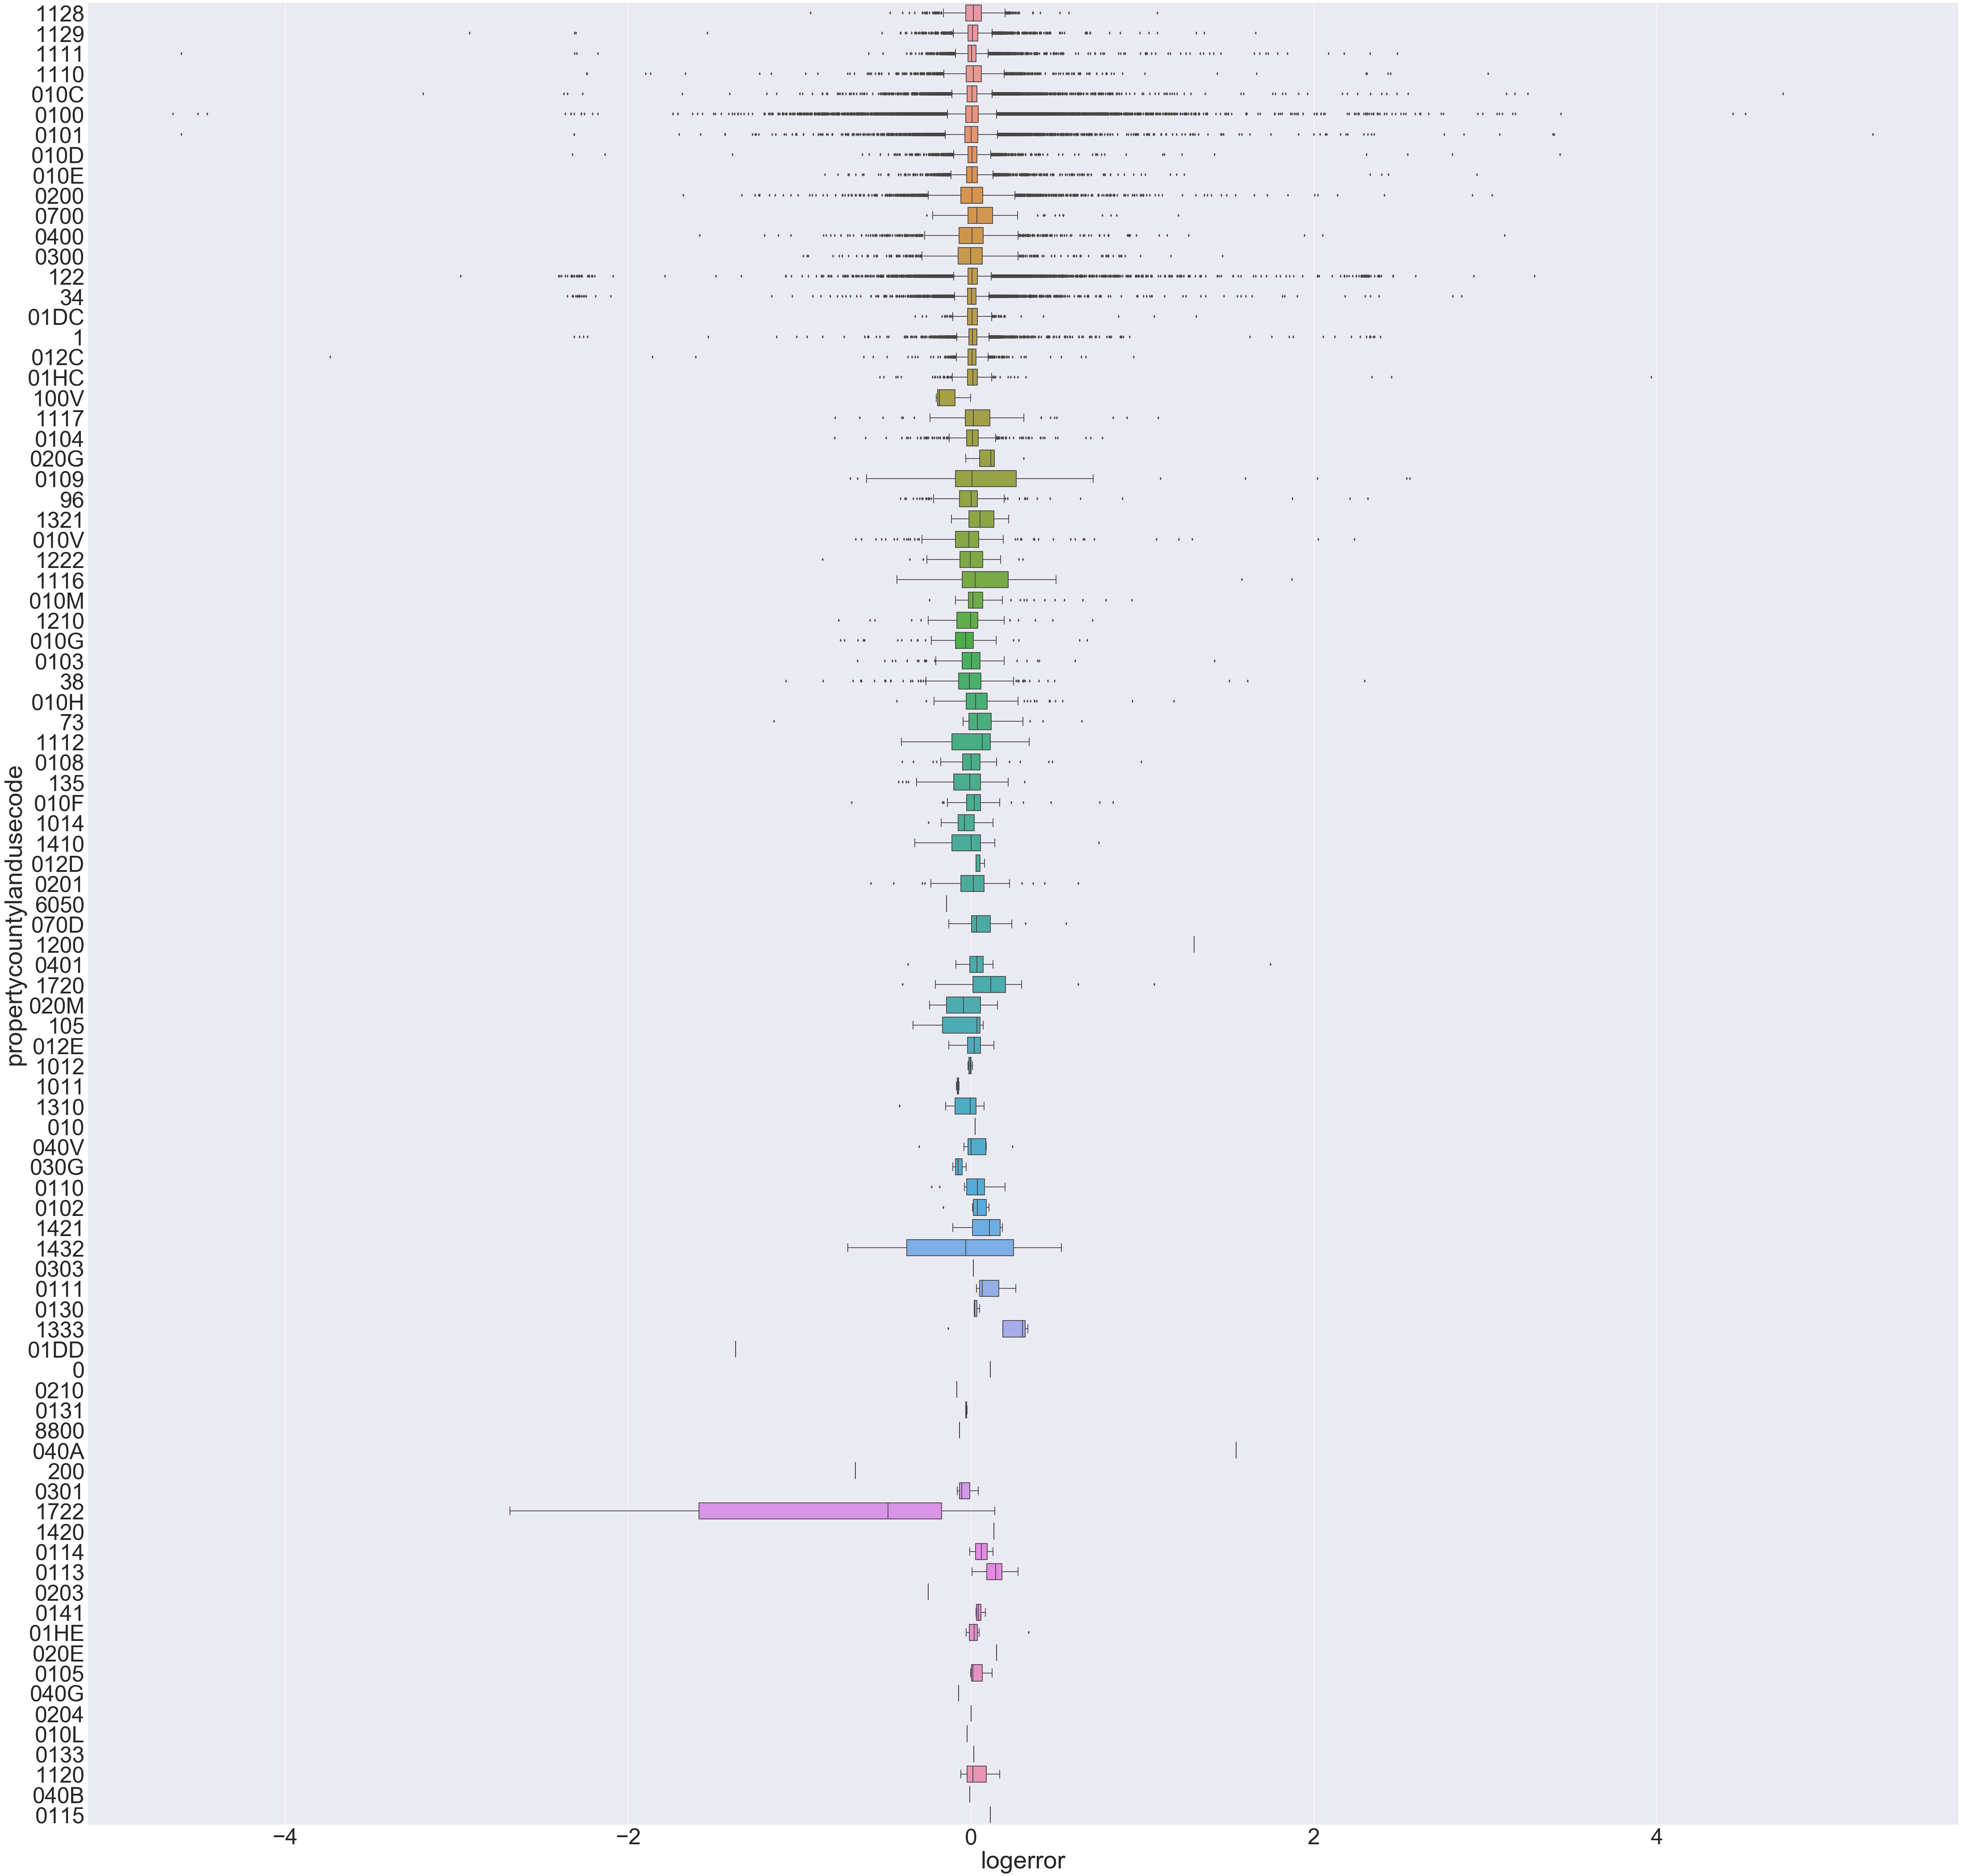

In [44]:
plt.close('all')
plt.figure(figsize=(75,75))
sns.set(font_scale = 5)
sns.boxplot(x='logerror', y='propertycountylandusecode', data=df_propertycountylandusecode)
plt.show()

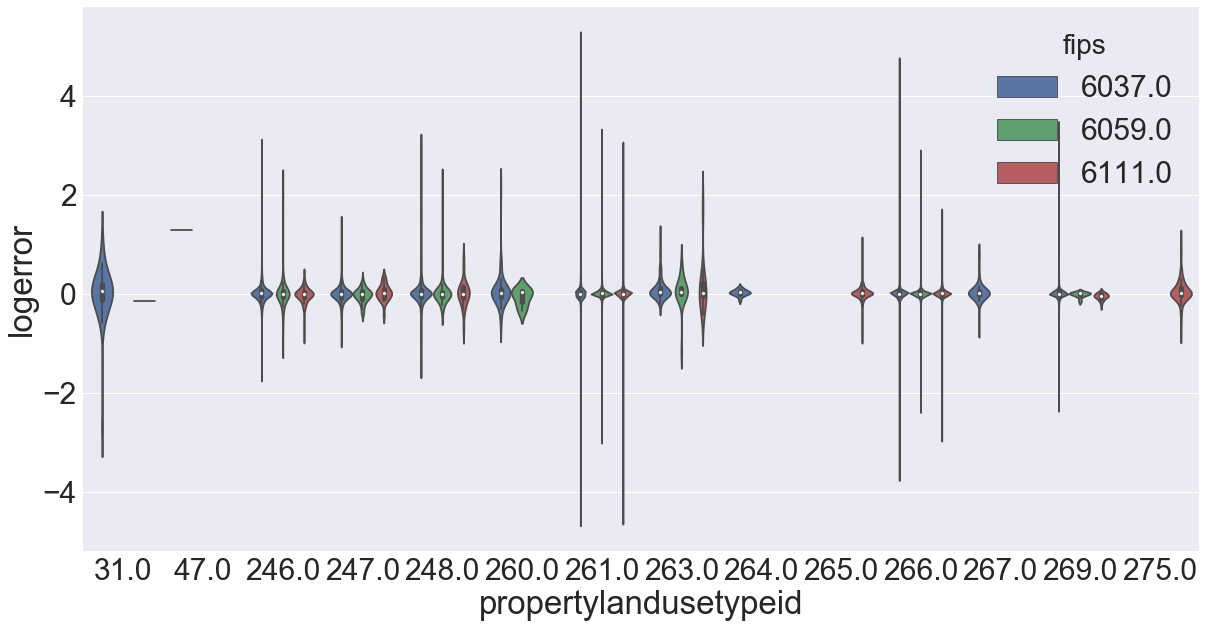

In [45]:
plt.close('all')
plt.figure(figsize=(20,10))
sns.set(font_scale = 3)
sns.violinplot(x='propertylandusetypeid', y='logerror', data=df_propertylandusetypeid, hue='fips',size=1)
plt.show()

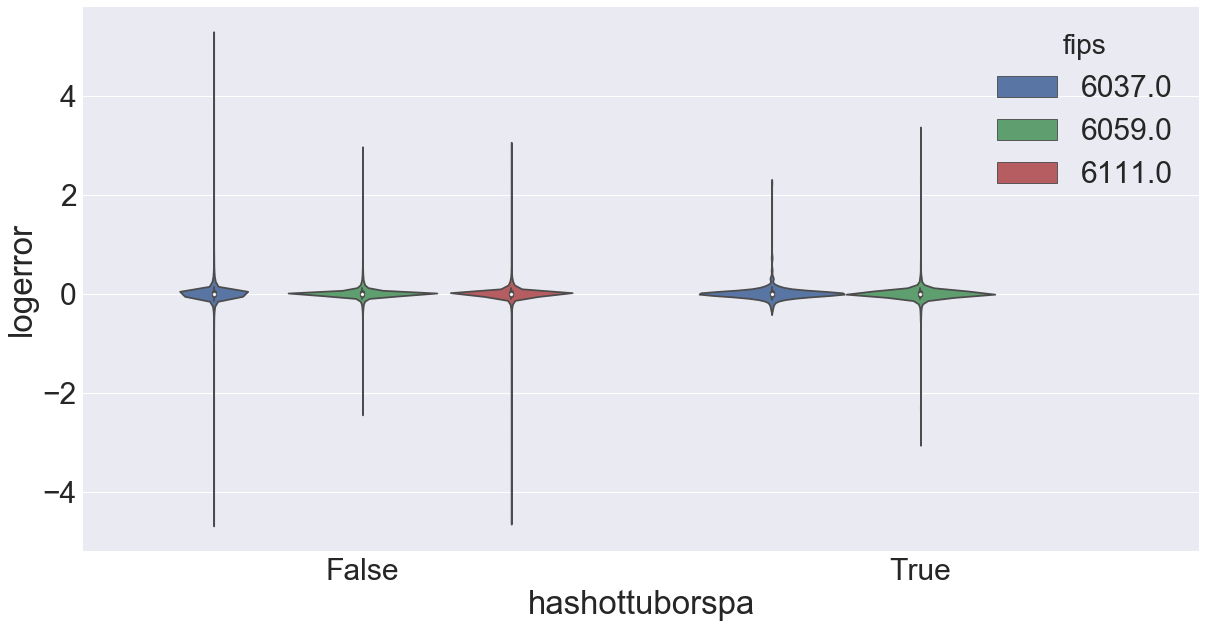

In [46]:
plt.close('all')
plt.figure(figsize=(20,10))
sns.set(font_scale = 3)
sns.violinplot(x='hashottuborspa', y='logerror', data=df_hashottuborspa, hue='fips',size=1)
plt.show()

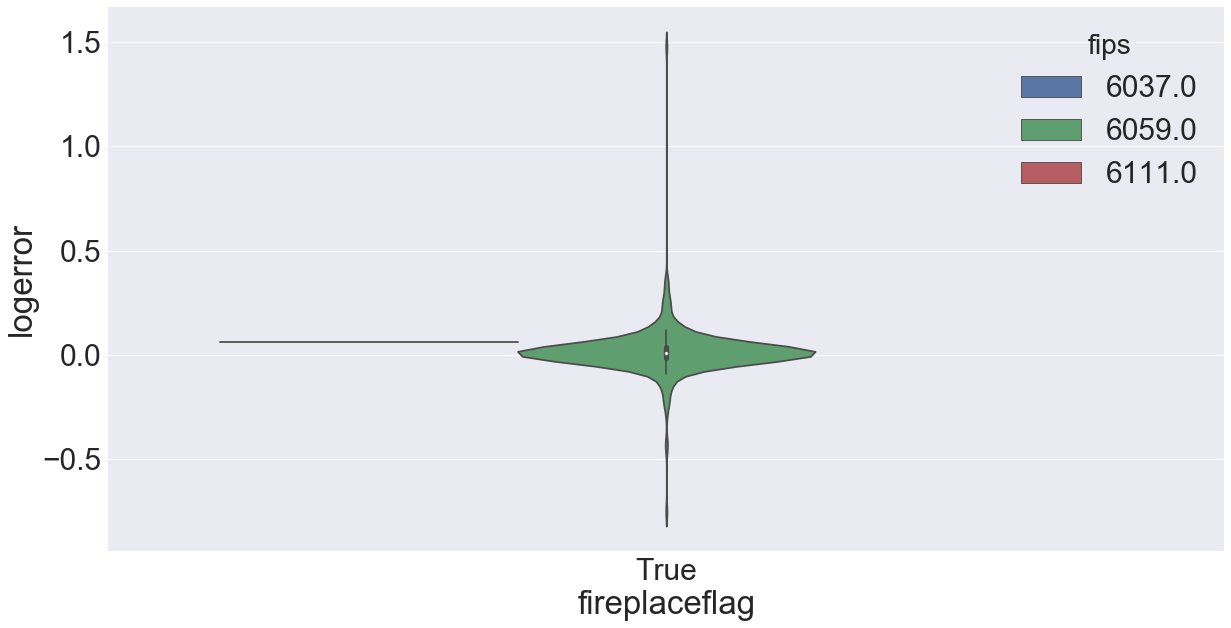

In [47]:
plt.close('all')
plt.figure(figsize=(20,10))
sns.set(font_scale = 3)
sns.violinplot(x='fireplaceflag', y='logerror', data=df_fireplaceflag, hue='fips',size=1)
plt.show()

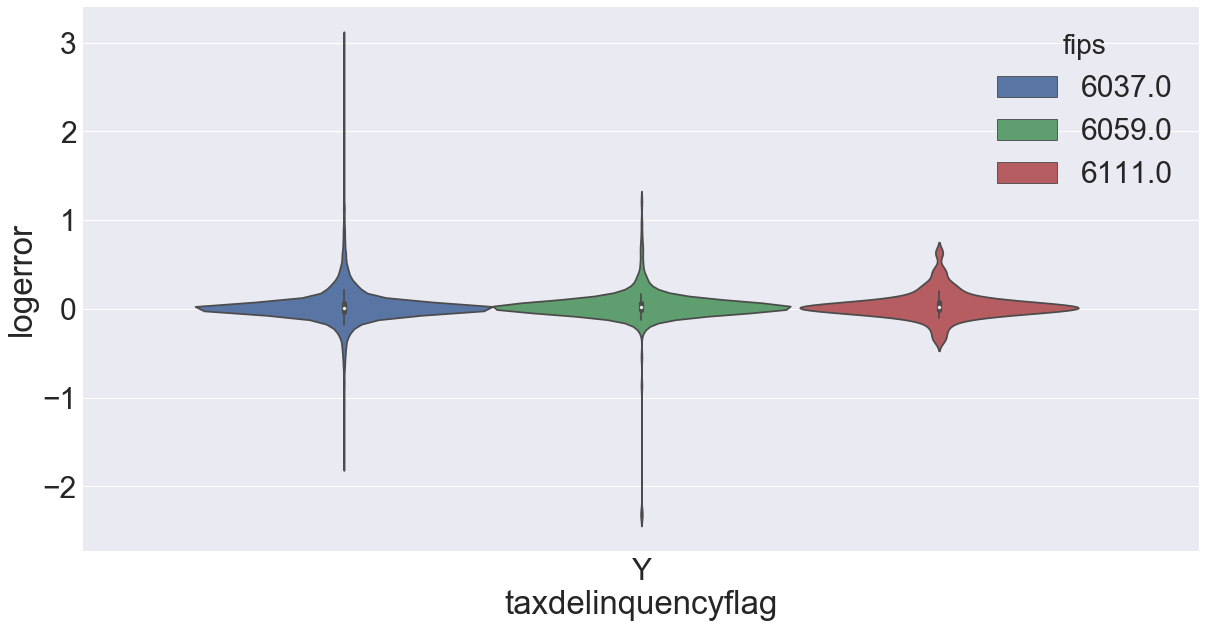

In [48]:
plt.close('all')
plt.figure(figsize=(20,10))
sns.set(font_scale = 3)
sns.violinplot(x='taxdelinquencyflag', y='logerror', data=df_taxdelinquencyflag, hue='fips',size=1)
plt.show()

# What Features Both Over and Underestimate the Log Error?

In [49]:
numerical = ['bathroomcnt','bedroomcnt','buildingqualitytypeid','calculatedbathnbr',
             'calculatedfinishedsquarefeet','finishedsquarefeet12',
             'fireplacecnt','fullbathcnt','garagecarcnt','garagetotalsqft','latitude','longitude',
             'lotsizesquarefeet','poolcnt','roomcnt','unitcnt','yearbuilt','numberofstories',
              'structuretaxvaluedollarcnt','taxvaluedollarcnt','assessmentyear','landtaxvaluedollarcnt','taxamount',
             'taxdelinquencyyear','logerror']

num = df_total[numerical]

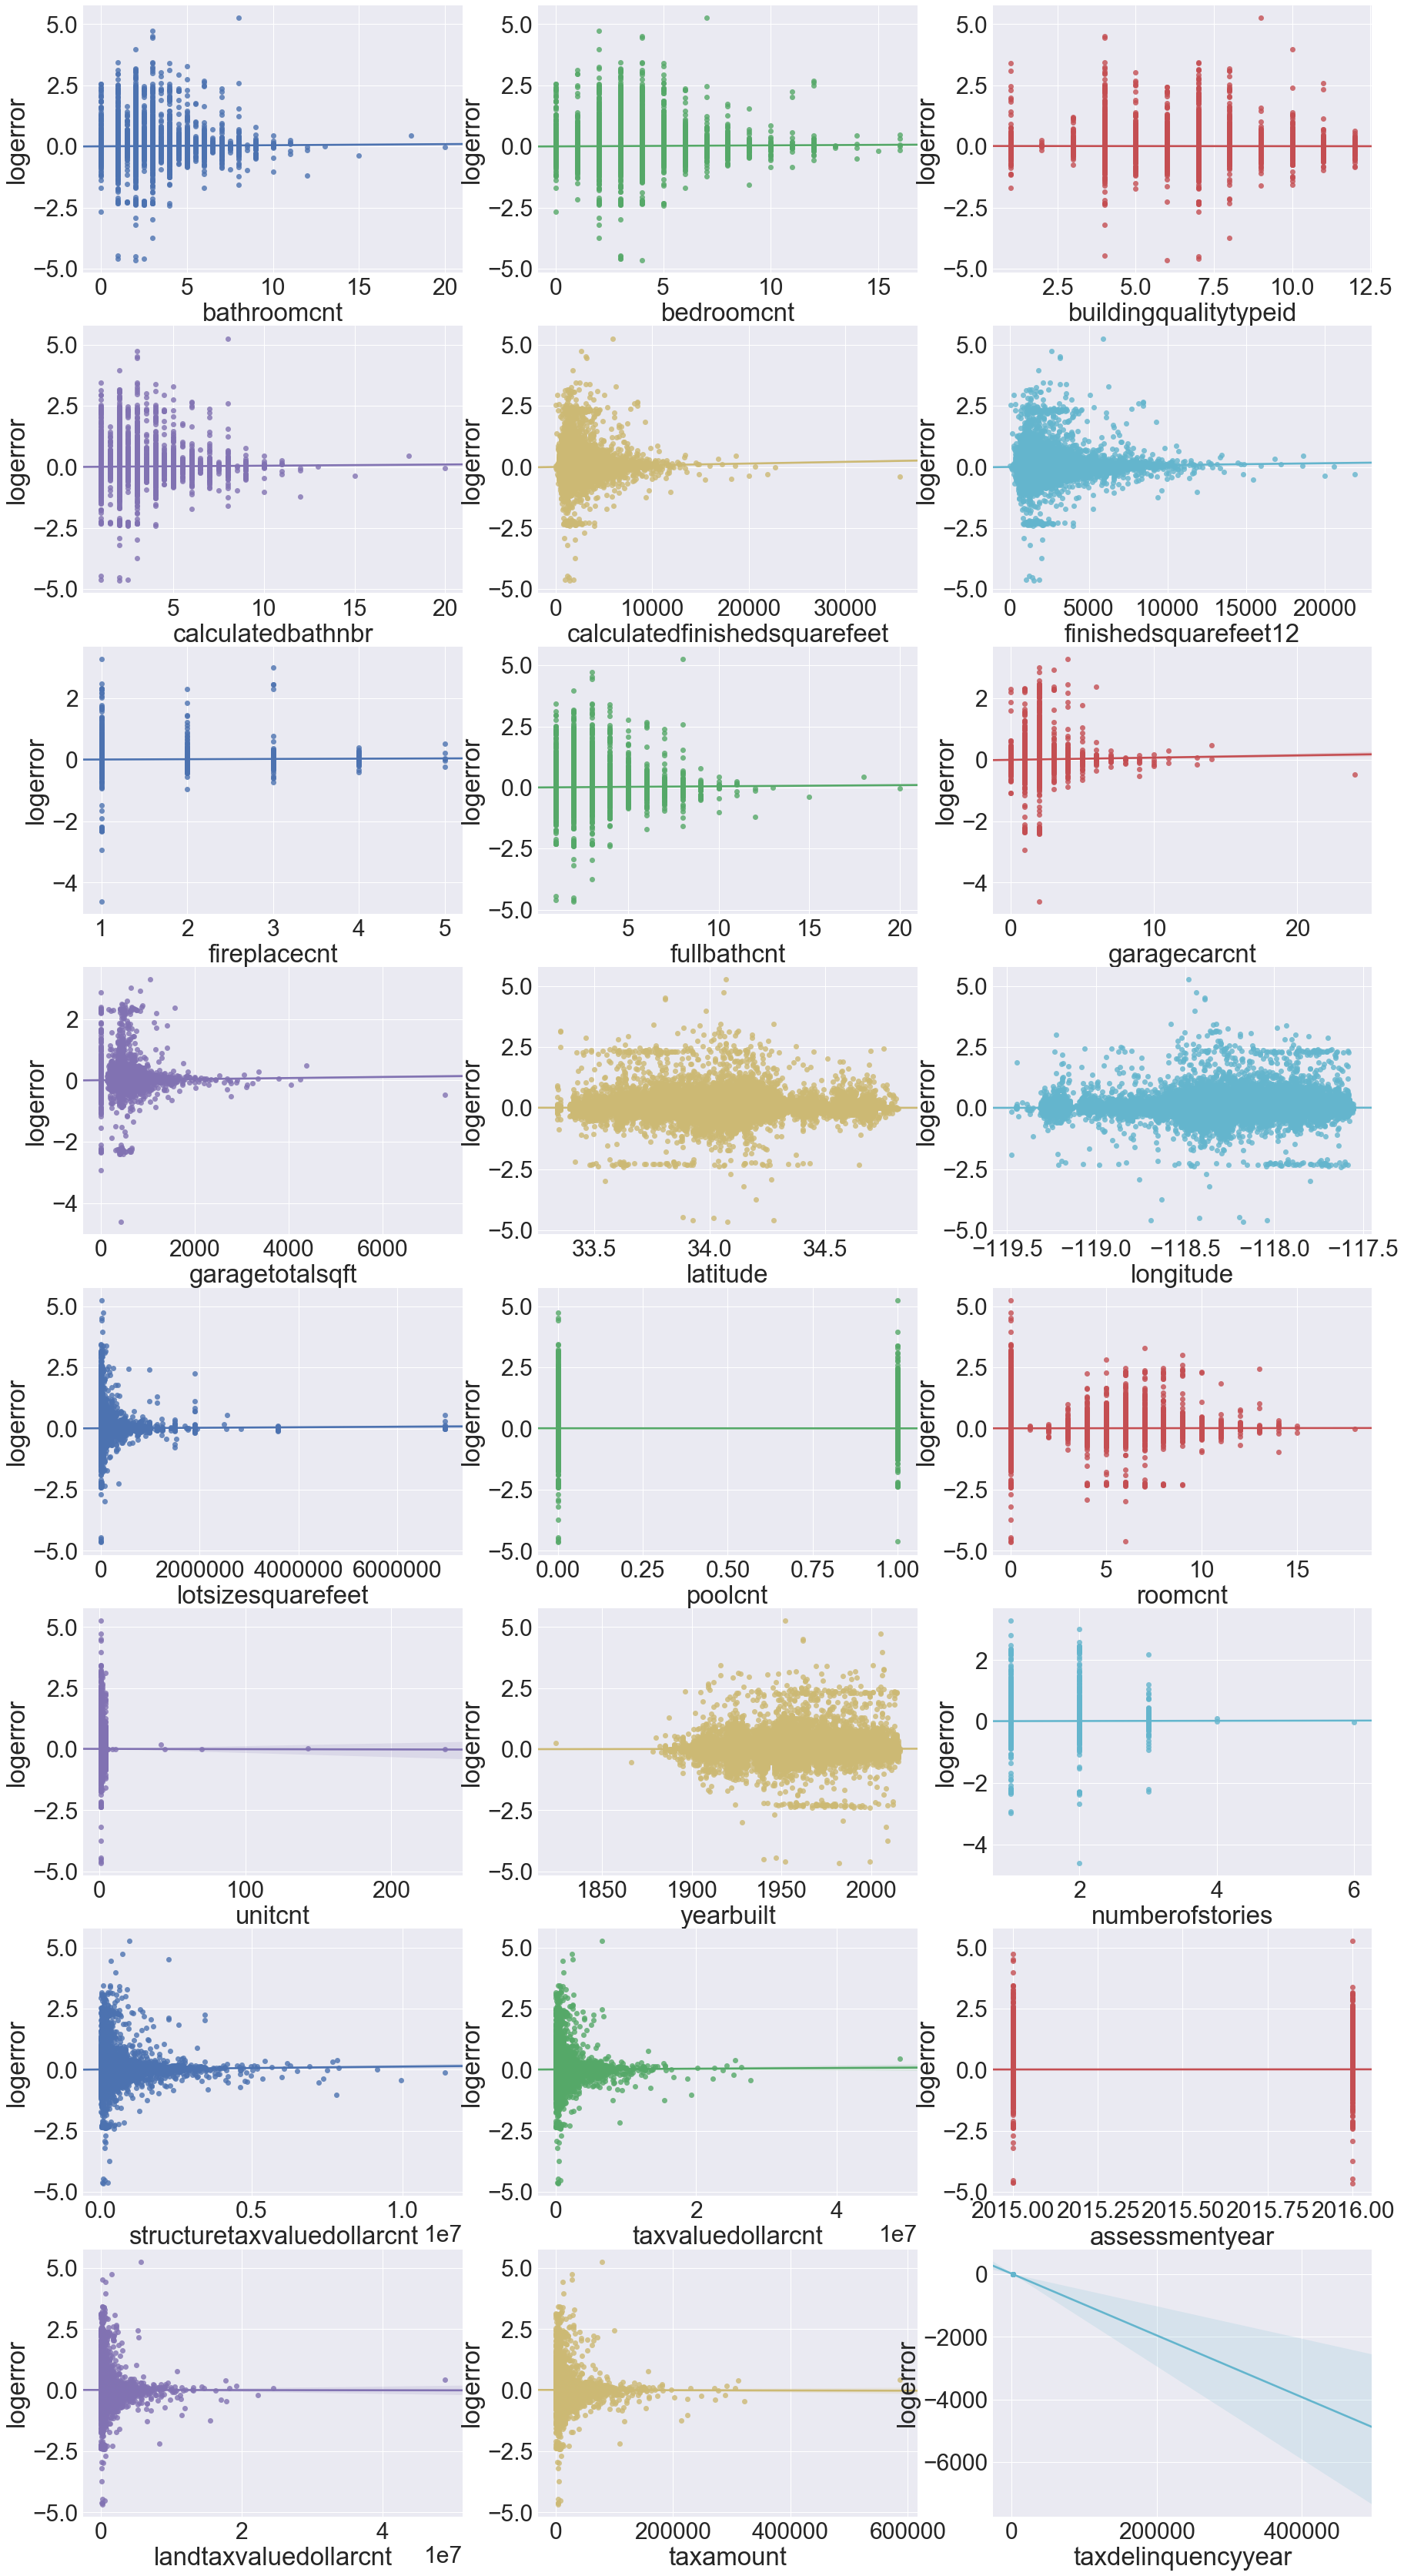

In [50]:
plt.close('all')
fig, axes = plt.subplots(round(len(num.columns) / 3), 3, figsize=(30, 60))

for i, ax in enumerate(fig.axes):
    if i < len(num):
        sns.regplot(x=num.columns[i], y=num['logerror'], data=num, ax=ax)
        plt.xlabel(numerical[i])
        
plt.show()  